# SVM MODEL

## Import Dataset



In [1]:
!pip install emoji
!pip install scikit-learn
!pip install langdetect
!pip install googletrans

In [2]:
import urllib #module helps download stuff from the internet
import tarfile # decompressing .tgz file
import pandas as pd # imports data manipulation library
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk # this has a lot of ML models
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from pathlib import Path
import re
import emoji
from langdetect import detect
from googletrans import Translator

In [3]:
def load_datasets():
    datasets_dir = Path("Datasets")
    file_name_train = "mediaeval-2015-trainingset.txt"
    file_name_test = 'mediaeval-2015-testset.txt'
    file_path_train = datasets_dir / file_name_train
    file_path_test = datasets_dir / file_name_test

    # Check if the datasets directory exists, if not create it
    if not datasets_dir.exists():
        datasets_dir.mkdir(parents=True, exist_ok=True)

    # Check if training file exists in the directory
    if not file_path_train.is_file():
        # URL to the raw file on GitHub
        url = "https://raw.githubusercontent.com/totoberni/COMP3222CW/main/Datasets/mediaeval-2015-trainingset.txt"
        urllib.request.urlretrieve(url, file_path_train)

    # Check if test file exists in the directory
    if not file_path_test.is_file():
        # URL to the raw file on GitHub
        url = "https://raw.githubusercontent.com/totoberni/COMP3222CW/main/Datasets/mediaeval-2015-testset.txt"
        urllib.request.urlretrieve(url, file_path_test)

load_datasets()

# Define Dataset Variable
datatrain = pd.read_csv('Datasets/mediaeval-2015-trainingset.txt', delimiter='\t')
datatest = pd.read_csv('Datasets/mediaeval-2015-testset.txt', delimiter='\t')

## Exploratory Data Analysis and Characterization


In [4]:
# View features for Training Dataset
datatrain.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake


In [5]:
# View features for Test dataset
datatest.head()

,tweetId,tweetText,userId,imageId(s),username,timestamp,label
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake


In [6]:
# Visualize datatype information
datatrain.info();


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     14277 non-null  int64 
 1   tweetText   14277 non-null  object
 2   userId      14277 non-null  int64 
 3   imageId(s)  14277 non-null  object
 4   username    14277 non-null  object
 5   timestamp   14277 non-null  object
 6   label       14277 non-null  object
dtypes: int64(2), object(5)
memory usage: 780.9+ KB


In [7]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweetId     3755 non-null   int64 
 1   tweetText   3755 non-null   object
 2   userId      3755 non-null   int64 
 3   imageId(s)  3755 non-null   object
 4   username    3755 non-null   object
 5   timestamp   3755 non-null   object
 6   label       3755 non-null   object
dtypes: int64(2), object(5)
memory usage: 205.5+ KB


In [8]:
# Check if there are any nans in the datasets
print(datatrain.isnull().sum(), '\n')
print(datatest.isnull().sum())


tweetId       0
tweetText     0
userId        0
imageId(s)    0
username      0
timestamp     0
label         0
dtype: int64 

tweetId       0
tweetText     0
userId        0
imageId(s)    0
username      0
timestamp     0
label         0
dtype: int64


In [9]:
datatrain.describe(include=object)

,tweetText,imageId(s),username,timestamp,label
count,14277,14277,14277,14277,14277
unique,12376,377,13498,13909,3
top,Unbelievable scene flying over #StatenIsland i...,sandyA_fake_29,SAGandAFTRA,Tue Oct 30 00:31:14 +0000 2012,fake
freq,42,1100,16,4,6742


In [10]:
datatest.describe(include=object)

,tweetText,imageId(s),username,timestamp,label
count,3755,3755,3755,3755,3755
unique,3706,88,3553,3449,2
top,"J'aime une vidéo @YouTube : ""SYRIA! SYRIAN HER...",syrianboy_1,_WTFVideos,Sat Apr 25 18:05:05 +0000 2015,fake
freq,4,1769,23,13,2546


In [11]:
# Viewing image ids training dataset
datatrain.rename(columns = {'imageId(s)':'imageid'}, inplace = True)
imgCount_train = datatrain.groupby(datatrain.imageid.str.split('_').str[0])['tweetId'].nunique()
print (imgCount_train, '\nTotal:' , imgCount_train.sum())

imageid
boston                 546
bringback              131
columbianChemicals     185
elephant                13
livr                     9
malaysia               501
passport                46
pigFish                 14
sandyA                9695
sandyB                2621
sochi                  402
underwater             112
Name: tweetId, dtype: int64 
Total: 14275


In [12]:
# Viewing image ids test dataset
datatest.rename(columns = {'imageId(s)':'imageid'}, inplace = True)
imgCount_test = datatest.groupby(datatest.imageid.str.split('_').str[0])['tweetId'].nunique()
print (imgCount_test, '\nTotal:' , imgCount_test.sum())

imageid
eclipse        277
garissa         77
nepal         1353
samurai        218
syrianboy     1769
varoufakis      61
Name: tweetId, dtype: int64 
Total: 3755


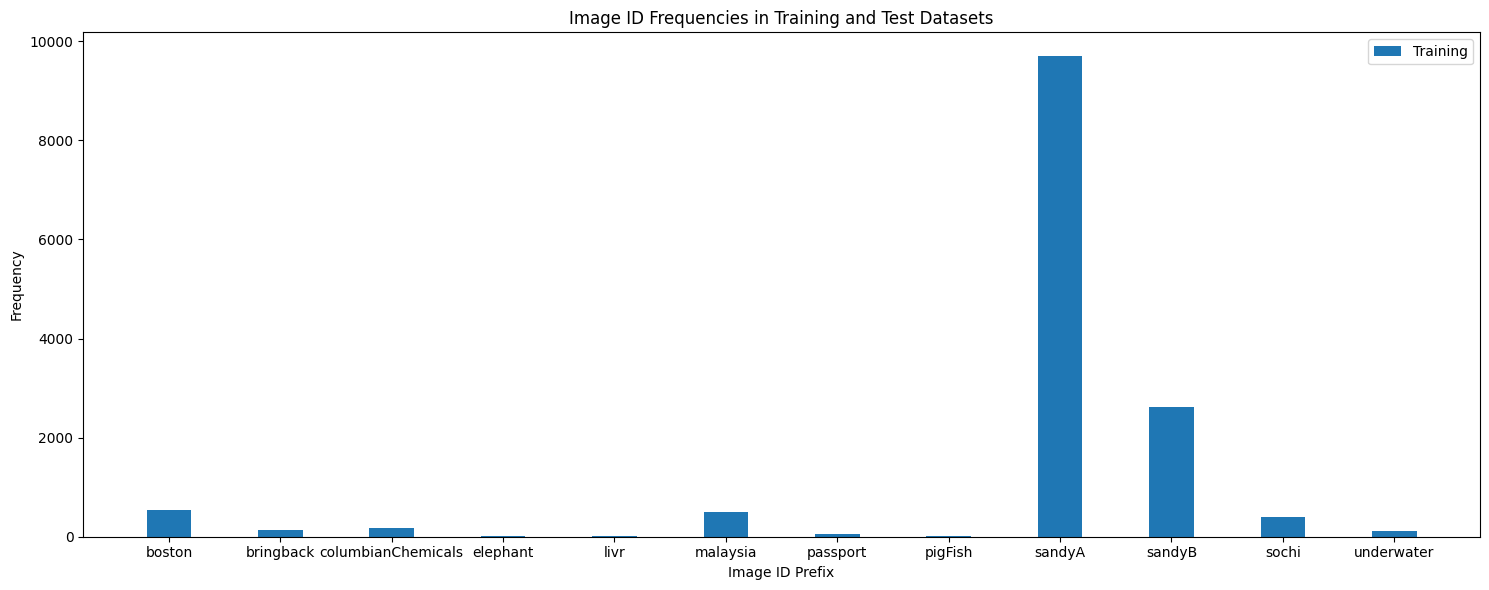

In [13]:
#Plot a bar chart of the frequencies
plt.figure(figsize=(15, 6))
plt.bar(imgCount_train.index, imgCount_train.values, width=0.4, label='Training', align='center')
# Labelling
plt.xlabel('Image ID Prefix')
plt.ylabel('Frequency')
plt.title('Image ID Frequencies in Training and Test Datasets')
plt.legend()
#Show
plt.tight_layout()
plt.show()

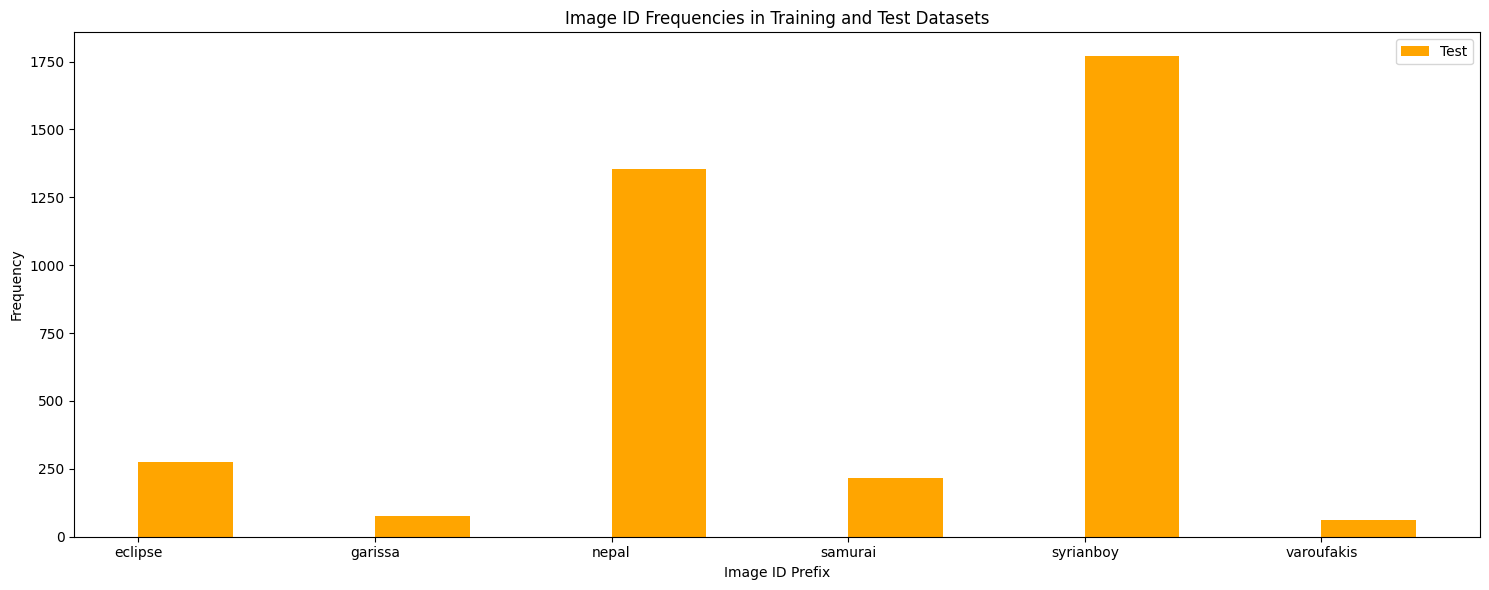

In [14]:
plt.figure(figsize=(15, 6))
plt.bar(imgCount_test.index, imgCount_test.values, width=0.4, label='Test', align='edge', color='orange')
plt.xlabel('Image ID Prefix')
plt.ylabel('Frequency')
plt.title('Image ID Frequencies in Training and Test Datasets')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# view label types and counts
v1 = datatrain['label'].value_counts()
v2 = datatest['label'].value_counts()

print(v1, '\n')
print(v2)

fake     6742
real     4921
humor    2614
Name: label, dtype: int64 

fake    2546
real    1209
Name: label, dtype: int64


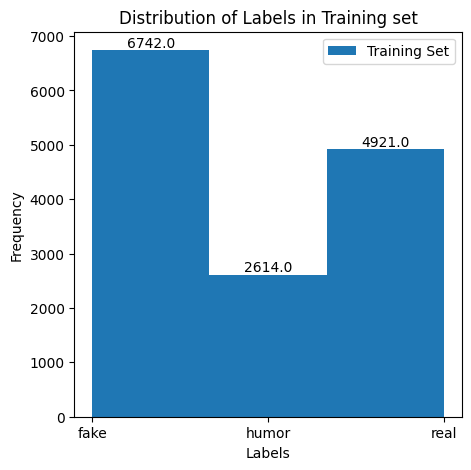

In [16]:
#Plot a histogram of the labels
plt.figure(figsize=(5, 5))
# Histogram for the training dataset
n, bins, patches = plt.hist(datatrain['label'], bins=len(datatrain['label'].unique()), label='Training Set')
for bar in patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
# Labelling
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in Training set')
plt.legend()

plt.show()

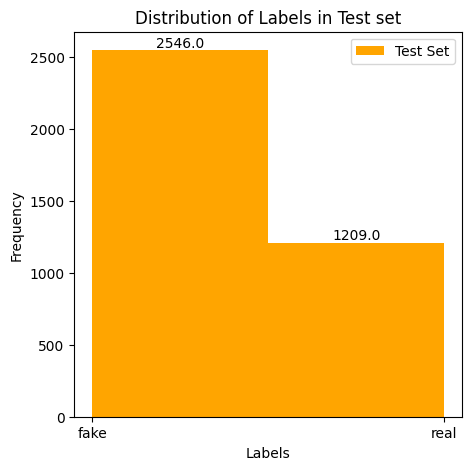

In [17]:
plt.figure(figsize=(5, 5))
n, bins, patches = plt.hist(datatest['label'], bins=len(datatest['label'].unique()),  label='Test Set', color='orange')
for bar in patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, yval, ha='center', va='bottom')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Distribution of Labels in Test set')
plt.legend()
plt.show()

From the plot above we can see that there are more fake labels than real or humor ones. This can be a problem in classification tasks as the model becomes biased towards a certain data distribution. <p>

The reality is that we don't know the current distribution of data on twitter, so **we can only assume** there are more fake tweets than there are real or humorous ones.<p>

One option is to merge the humor and fake posts together or to remove the humor ones alltogether. We will try different combinations to see which is the most effective.

In [18]:
# Do some statistics about data distributions
print(f'Real/Fake ratio in Training set: {v1[1]/v1[0]}')
print(f'Real/Fake ratio in Test set: {v2[1]/v2[0]}')
print(f'Real/Fake ratio in Training set when humour and fake labels are merged:{v1[1]/(v1[2]+v1[0])}')

Real/Fake ratio in Training set: 0.7299021061999407
Real/Fake ratio in Test set: 0.4748625294579733
Real/Fake ratio in Training set when humour and fake labels are merged:0.5259726378794357


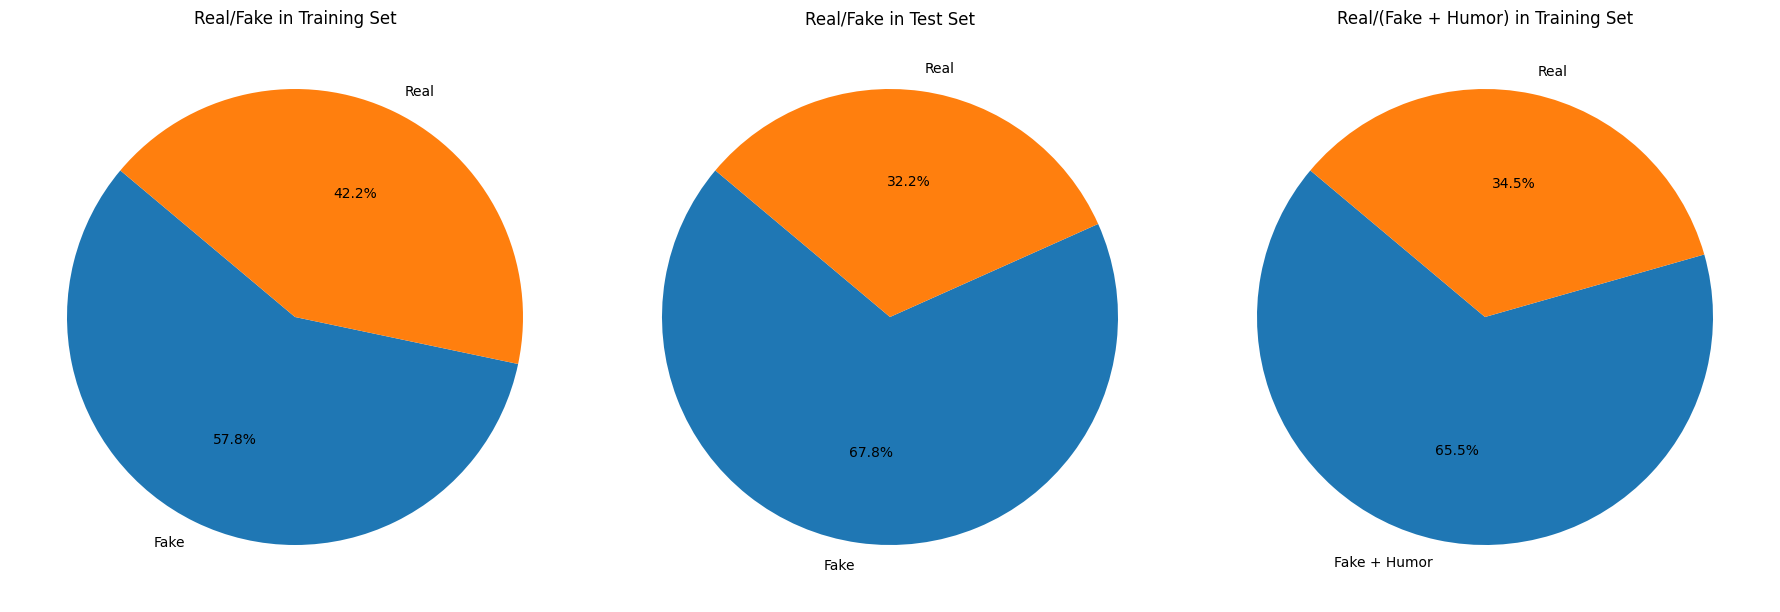

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
# Plot for Training Set Real vs Fake
axs[0].pie([v1['fake'], v1['real']], labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=140)
axs[0].set_title('Real/Fake in Training Set')
# Plot for Test Set Real vs Fake
axs[1].pie([v2['fake'], v2['real']], labels=['Fake', 'Real'], autopct='%1.1f%%', startangle=140)
axs[1].set_title('Real/Fake in Test Set')
# Plot for Training Set Real vs (Fake + Humor)
axs[2].pie([v1['fake'] + v1.get('humor', 0), v1['real']], labels=['Fake + Humor', 'Real'], autopct='%1.1f%%', startangle=140)
axs[2].set_title('Real/(Fake + Humor) in Training Set')
# Display the pie charts
plt.tight_layout()
plt.show()

Changing the distribution to match the test dataset is not ideal because it biases the model<br>
However, if we don't change the dataset as is, the model will inevitably perform more poorly<br>
Because we are being asked to only identify true or false tweets, it's best to have a model that does exactly that, but with more error, rather than an overfitted model.

In [20]:
# View different languages in dataset
def lang_detect(text):
    try:
        detected_text = detect(text)
        return detected_text
    except:
        return "unknown"

datatrain['language'] = datatrain['tweetText'].apply(lang_detect)
datatest['language'] = datatest['tweetText'].apply(lang_detect)

# Convert value counts to string and print in a single line
print('Languages in Training Set:', datatrain['language'].value_counts().to_dict())
print('Languages in Test Set:', datatest['language'].value_counts().to_dict())

Languages in Training Set: {'en': 10945, 'es': 1295, 'tl': 324, 'fr': 214, 'id': 180, 'pt': 159, 'de': 125, 'so': 123, 'cy': 115, 'it': 106, 'nl': 85, 'ar': 79, 'af': 68, 'ru': 60, 'sv': 48, 'no': 39, 'pl': 37, 'ca': 35, 'tr': 31, 'da': 25, 'ja': 21, 'th': 19, 'fi': 18, 'et': 14, 'vi': 13, 'sk': 12, 'sw': 11, 'zh-cn': 10, 'bg': 8, 'ro': 8, 'sq': 7, 'hu': 7, 'sl': 6, 'hr': 6, 'ko': 6, 'el': 5, 'fa': 4, 'lt': 4, 'he': 1, 'unknown': 1, 'mk': 1, 'hi': 1, 'lv': 1}
Languages in Test Set: {'en': 2784, 'so': 502, 'ar': 183, 'es': 60, 'de': 41, 'pt': 36, 'fr': 32, 'nl': 23, 'it': 18, 'tr': 12, 'ca': 8, 'id': 6, 'sq': 6, 'fi': 5, 'af': 5, 'cy': 5, 'hi': 5, 'ja': 3, 'th': 2, 'vi': 2, 'sv': 2, 'pl': 2, 'te': 2, 'tl': 2, 'el': 2, 'ru': 1, 'et': 1, 'ko': 1, 'ta': 1, 'bg': 1, 'hr': 1, 'lt': 1}


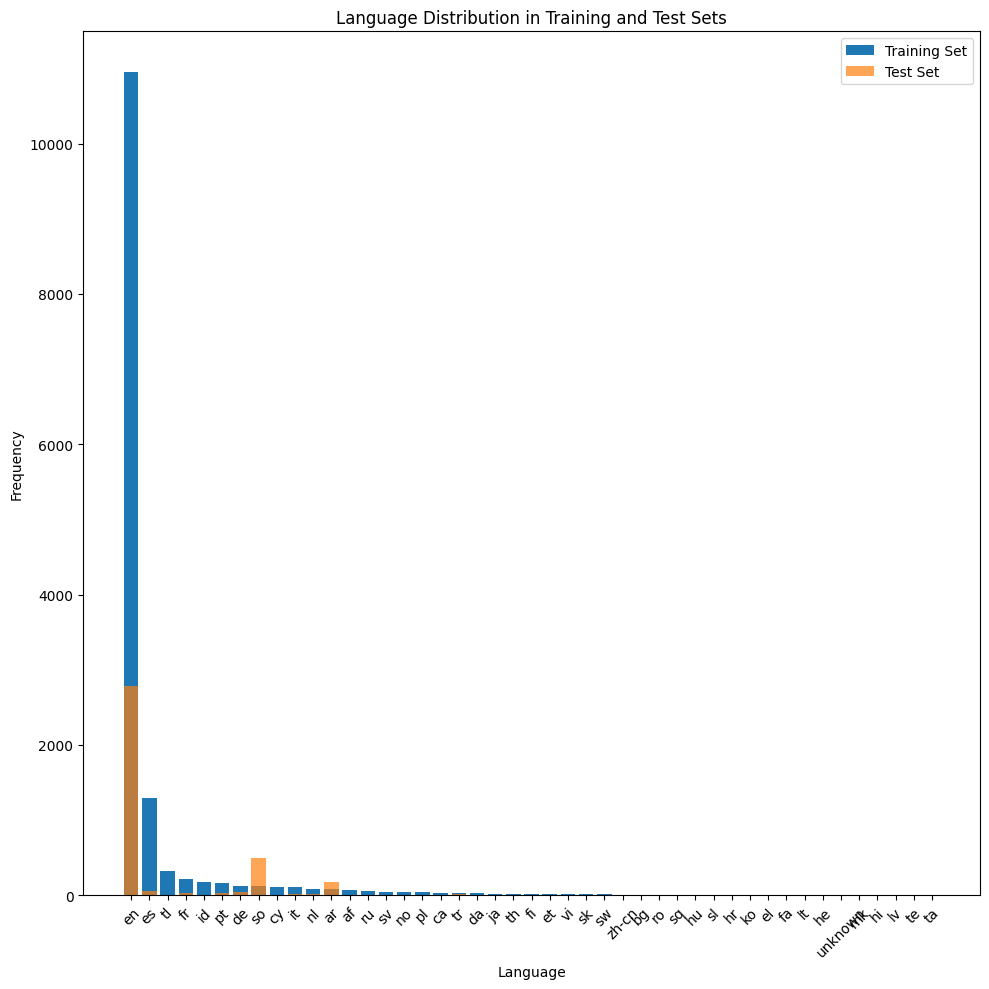

In [21]:
train_lang_counts = datatrain['language'].value_counts()
test_lang_counts = datatest['language'].value_counts()

# Create a new figure for plotting
plt.figure(figsize=(10, 10))
# Plot the training set language distribution
plt.bar(train_lang_counts.index, train_lang_counts.values, label='Training Set')
# Plot the test set language distribution
plt.bar(test_lang_counts.index, test_lang_counts.values, alpha=0.7, label='Test Set')
#Labelling
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Language Distribution in Training and Test Sets')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


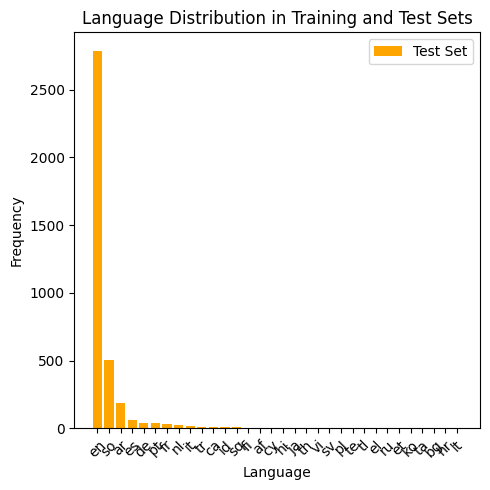

In [22]:
test_lang_counts = datatest['language'].value_counts()
plt.figure(figsize=(5, 5))
# Plot the test set language distribution
plt.bar(test_lang_counts.index, test_lang_counts.values,  label='Test Set', color='orange')
#Labelling
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Language Distribution in Training and Test Sets')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
datatrain.head()

,tweetId,tweetText,userId,imageid,username,timestamp,label,language
0,263046056240115712,¿Se acuerdan de la película: “El día después d...,21226711,sandyA_fake_46,iAnnieM,Mon Oct 29 22:34:01 +0000 2012,fake,es
1,262995061304852481,@milenagimon: Miren a Sandy en NY! Tremenda i...,192378571,sandyA_fake_09,CarlosVerareal,Mon Oct 29 19:11:23 +0000 2012,fake,es
2,262979898002534400,"Buena la foto del Huracán Sandy, me recuerda a...",132303095,sandyA_fake_09,LucasPalape,Mon Oct 29 18:11:08 +0000 2012,fake,es
3,262996108400271360,Scary shit #hurricane #NY http://t.co/e4JLBUfH,241995902,sandyA_fake_29,Haaaaarryyy,Mon Oct 29 19:15:33 +0000 2012,fake,en
4,263018881839411200,My fave place in the world #nyc #hurricane #sa...,250315890,sandyA_fake_15,princess__natt,Mon Oct 29 20:46:02 +0000 2012,fake,en


In [24]:
datatest.head()

,tweetId,tweetText,userId,imageid,username,timestamp,label,language
0,578854927457349632,kereeen RT @Shyman33: Eclipse from ISS.... htt...,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,en
1,578874632670953472,Absolutely beautiful! RT @Shyman33: Eclipse fr...,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,en
2,578891261353984000,“@Shyman33: Eclipse from ISS.... http://t.co/C...,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,en
3,578846612312748032,Eclipse from ISS.... http://t.co/En87OtvsU6,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,en
4,578975333841551360,@ebonfigli: Éclipse vue de l'ISS... Autre chos...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,fr


## Data Cleaning and Preprocessing

In [25]:
# Data Analysis Imports
import nltk
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import re


nltk.download('stopwords')
nltk.download('opinion_lexicon')
nltk.download('punkt')
stop_words = list(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:
def tokenize(tweet):
    # Tokenize by splitting on whitespace and remove punctuation
    tokens = re.findall(r'\b\w+\b', tweet.lower())
    # Filter out stopwords from tokens
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [27]:
# Clean tweet text so it can be interpreted
def preprocess_tweet_text(row):
    tweet = row['tweetText'] #Define local variables
    tweet = tweet.lower() # Convert to lowercase
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)# Remove URLs
    tweet = tweet.replace("\\n",'') #Remove newlines
    tweet = re.sub(r'\@\w+','', tweet) #Remove user @ references but keep the hashtags
    tweet = emoji.demojize(tweet) #Translate emojis to text
    tweet = re.sub(r'[^a-zA-Z#\s!?]', '', tweet) #Remove punctuations except for #, !, and ?
    tweet = re.sub(r'\s+', ' ', tweet).strip()  # Remove additional whitespaces
    tokens = tokenize(tweet) #Tokenize
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Apply the function to datasets rows
datatrain['tweetText'] = datatrain.apply(preprocess_tweet_text, axis=1)
datatest['tweetText'] = datatest.apply(preprocess_tweet_text, axis=1)

In [28]:
print(datatrain.head()) # Check nothing has been broken
print(datatest.head())

              tweetId                                          tweetText  \
0  263046056240115712  se acuerdan de la pelcula el da despus de maan...   
1  262995061304852481  miren sandy en ny tremenda imagen del huracn p...   
2  262979898002534400  buena la foto del huracn sandy recuerda la pel...   
3  262996108400271360                            scary shit hurricane ny   
4  263018881839411200  fave place world nyc hurricane sandy statueofl...   

      userId         imageid        username                       timestamp  \
0   21226711  sandyA_fake_46         iAnnieM  Mon Oct 29 22:34:01 +0000 2012   
1  192378571  sandyA_fake_09  CarlosVerareal  Mon Oct 29 19:11:23 +0000 2012   
2  132303095  sandyA_fake_09     LucasPalape  Mon Oct 29 18:11:08 +0000 2012   
3  241995902  sandyA_fake_29     Haaaaarryyy  Mon Oct 29 19:15:33 +0000 2012   
4  250315890  sandyA_fake_15  princess__natt  Mon Oct 29 20:46:02 +0000 2012   

  label language  
0  fake       es  
1  fake       es  
2  fa

In [29]:
datatrain.loc[(datatrain.label == 'humor'), 'label'] = 'fake'
datatest.loc[(datatrain.label == 'humor'), 'label'] = 'fake'

## Further EDA

Now that the data has been cleaned, it can be analysed a bit further

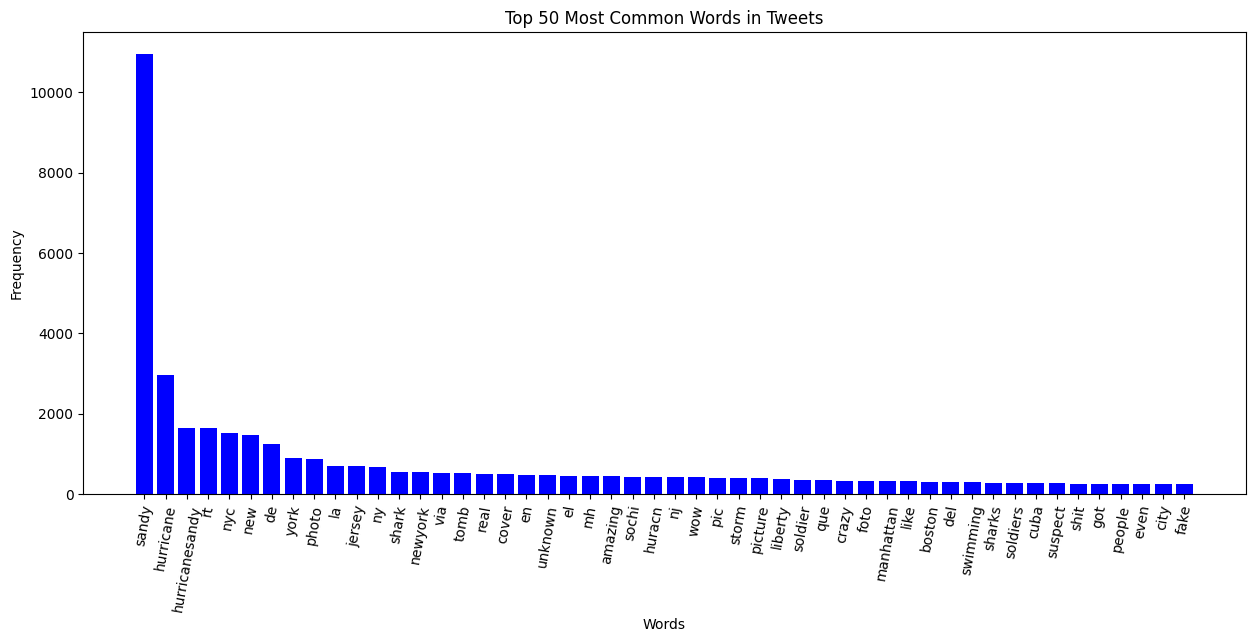

[('sandy', 10943), ('hurricane', 2964), ('hurricanesandy', 1654), ('rt', 1637), ('nyc', 1520), ('new', 1474), ('de', 1246), ('york', 898), ('photo', 865), ('la', 696), ('jersey', 692), ('ny', 679), ('shark', 560), ('newyork', 557), ('via', 533), ('tomb', 528), ('real', 512), ('cover', 496), ('en', 487), ('unknown', 468), ('el', 463), ('mh', 460), ('amazing', 449), ('sochi', 434), ('huracn', 426), ('nj', 420), ('wow', 419), ('pic', 405), ('storm', 403), ('picture', 402), ('liberty', 369), ('soldier', 362), ('que', 347), ('crazy', 335), ('foto', 328), ('manhattan', 326), ('like', 321), ('boston', 308), ('del', 303), ('swimming', 298), ('sharks', 287), ('soldiers', 270), ('cuba', 270), ('suspect', 270), ('shit', 265), ('got', 260), ('people', 259), ('even', 256), ('city', 253), ('fake', 248)]


In [30]:
#Making a bar chart of token frequency in Training Dataset
tokens = datatrain['tweetText'].apply(tokenize).sum()

# Count the frequency of each token
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(50)

# Display the 100 most common words in a bar chart
words, frequencies = zip(*most_common_words)

# Plotting the bar chart
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {50} Most Common Words in Tweets')
plt.xticks(rotation=80)
plt.show()
print(most_common_words)

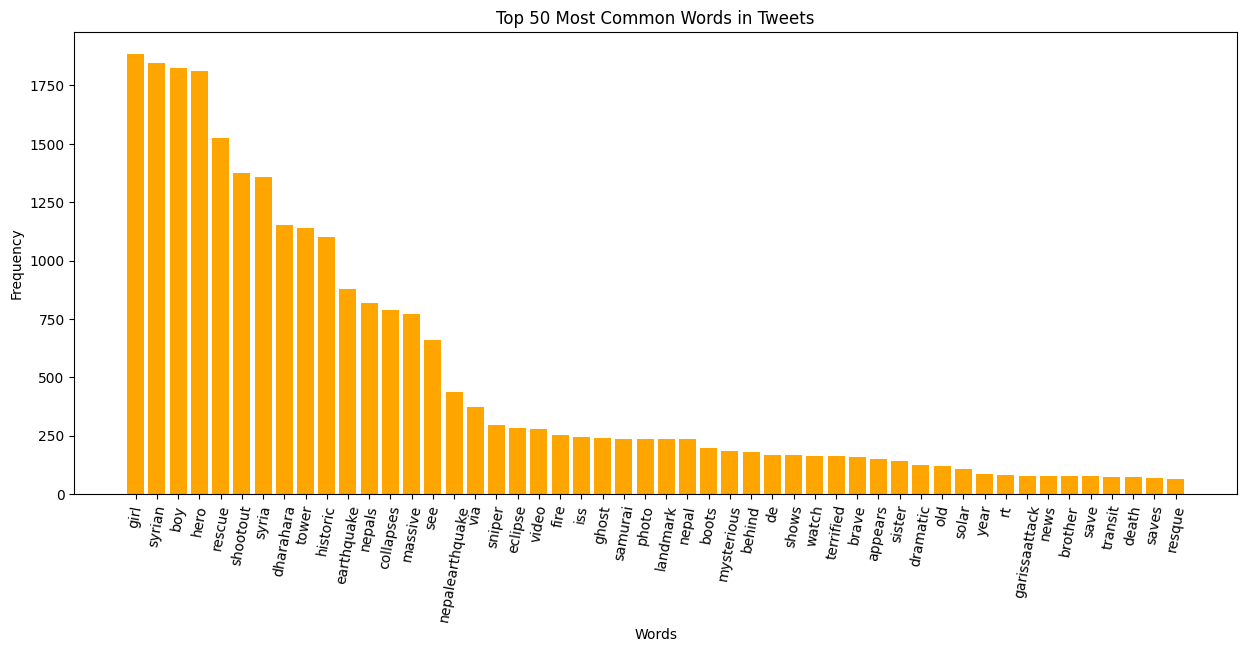

In [31]:
tokens = datatest['tweetText'].apply(tokenize).sum()
word_freq = Counter(tokens)
most_common_words = word_freq.most_common(50)
words, frequencies = zip(*most_common_words)
plt.figure(figsize=(15, 6))
plt.bar(words, frequencies, color='orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {50} Most Common Words in Tweets')
plt.xticks(rotation=80)
plt.show()

In [32]:
# Function to extract top N bigrams
def get_top_bigrams(corpus, n=50):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in sorted(vec.vocabulary_.items(), key=lambda item: item[1])]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

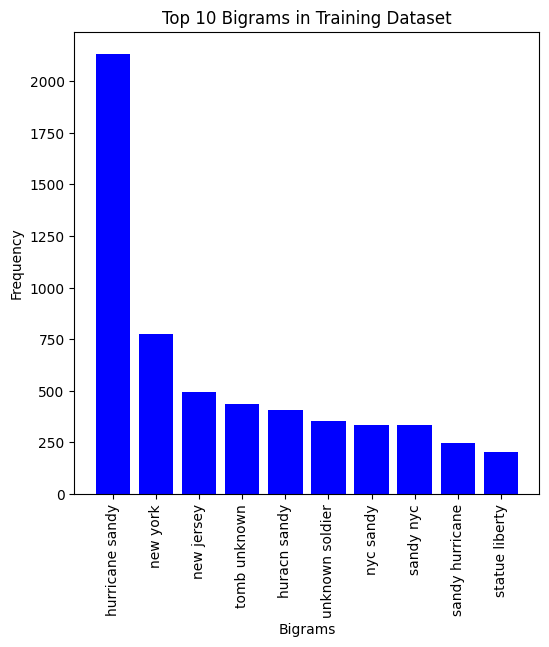

Bigram           Frequency
huracn sandy     406          1
hurricane sandy  2133         1
new jersey       496          1
new york         776          1
nyc sandy        336          1
sandy hurricane  247          1
sandy nyc        335          1
statue liberty   203          1
tomb unknown     436          1
unknown soldier  352          1
dtype: int64


In [33]:
# Extract top 10 bigrams from the 'tweetText' column
top_bigrams = get_top_bigrams(datatrain['tweetText'], n=10)

# Convert the top bigrams into a DataFrame
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plotting
plt.figure(figsize=(6, 6))  # Increased figure size for clarity
plt.bar(df_bigrams['Bigram'], df_bigrams['Frequency'], color='blue')
plt.title('Top 10 Bigrams in Training Dataset')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()
print(df_bigrams.value_counts())

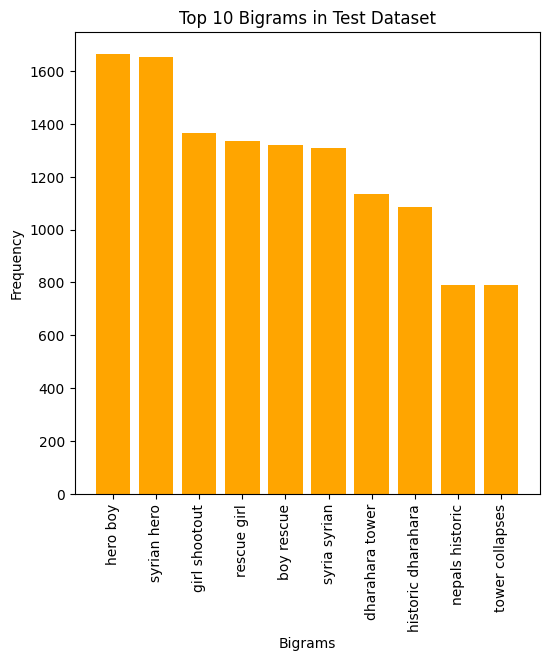

In [34]:
# Extract top 50 bigrams from the 'tweetText' column
top_bigrams = get_top_bigrams(datatest['tweetText'], n=10)

# Convert the top bigrams into a DataFrame
df_bigrams = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])

# Plotting
plt.figure(figsize=(6, 6))  # Increased figure size for clarity
plt.bar(df_bigrams['Bigram'], df_bigrams['Frequency'], color='orange')
plt.title('Top 10 Bigrams in Test Dataset')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.show()

In [35]:
# Calculate the length of each tweet
datatrain_tweet_length = datatrain['tweetText'].apply(lambda x: len(x))
datatest_tweet_length = datatest['tweetText'].apply(lambda x: len (x))

In [36]:
datatrain_tweet_length.describe()

count    14277.000000
mean        50.780696
std         57.323172
min          0.000000
25%         29.000000
50%         48.000000
75%         68.000000
max       3526.000000
Name: tweetText, dtype: float64

In [37]:
datatest_tweet_length.describe()

count    3755.000000
mean       61.931292
std        32.213370
min         0.000000
25%        46.000000
50%        60.000000
75%        75.000000
max      1224.000000
Name: tweetText, dtype: float64

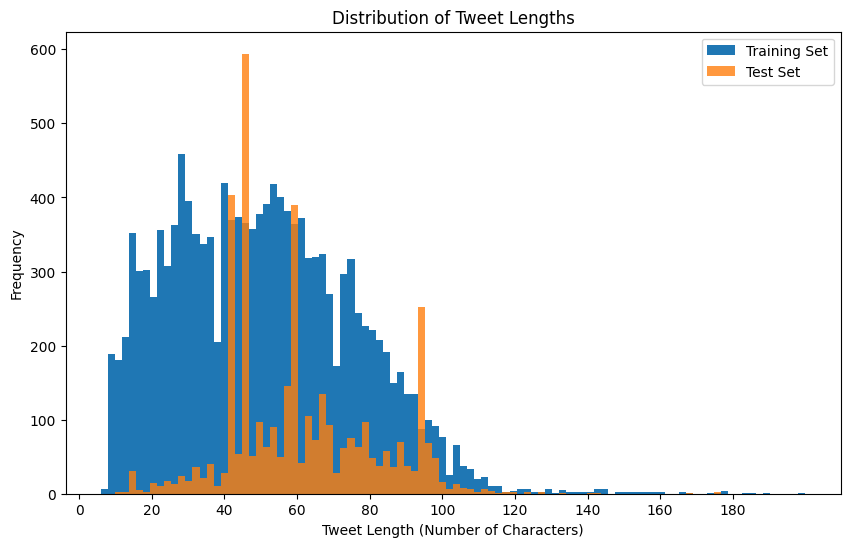

In [38]:
# Plot the distribution of tweet lengths
plt.figure(figsize=(10, 6))

# Plot the distribution of tweet lengths
# Plot the histogram with specified bins and range
plt.hist(datatrain_tweet_length, bins=100, range=(6,200), label='Training Set')
plt.hist(datatest_tweet_length, bins=100, range=(6,200), label='Test Set', alpha=0.8)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
# Set x-axis ticks with a step of about 200
plt.xticks(np.arange(0, 200, 20))  # Adjusted end value to include 4489

plt.show()

## Feature Engineering

First add the following features: <p>
- frequency of each tweet
- tweet length
- sentiment score

In [39]:
from sklearn.svm import SVC

In [40]:
#Adding tweet length
datatrain['tweet_length'] = datatrain_tweet_length
# Adding frequency metric
datatrain['frequency'] = datatrain_tweet_length
datatrain['frequency'].value_counts()
# Display the distribution of tweet frequencies after editing
datatrain.describe(include=object)

,tweetText,imageid,username,timestamp,label,language
count,14277,14277,14277,14277,14277,14277
unique,10877,377,13498,13909,2,43
top,sandy,sandyA_fake_29,SAGandAFTRA,Tue Oct 30 00:31:14 +0000 2012,fake,en
freq,338,1100,16,4,9356,10945


In [41]:
datatest['tweet_length'] = datatest_tweet_length
# Adding frequency metric for datatest
datatest['frequency'] = datatest_tweet_length
datatest['frequency'].value_counts()
#datatest.drop_duplicates(subset=['tweetText'], keep='first', inplace=True)
# Display the distribution of tweet frequencies after editing
datatest.describe(include=object)

,tweetText,imageid,username,timestamp,label,language
count,3755,3755,3755,3755,3755,3755
unique,1483,88,3553,3449,2,32
top,syria syrian hero boy rescue girl shootout see,syrianboy_1,_WTFVideos,Sat Apr 25 18:05:05 +0000 2015,fake,en
freq,404,1769,23,13,2546,2784


In [42]:
# Define sentiment score function
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiment_analysis(text):
    # Tokenize the text
    tokens = tokenize(text)
    # Initialize counters
    positive_count = 0
    negative_count = 0
    # Count positive and negative words
    for word in tokens:
        if word in positive_words:
            positive_count += 1
        elif word in negative_words:
            negative_count += 1
    # Calculate the sentiment score
    sentiment_score = (positive_count - negative_count) / max(len(tokens), 1)  # Avoid division by zero
    # Normalize the score to be between -1 and 1
    sentiment_score = max(min(sentiment_score, 1), -1)
    return sentiment_score

# Apply the feelings to our datasets
datatrain['sentiment_score'] = datatrain ['tweetText'].apply(sentiment_analysis)
datatest['sentiment_score'] = datatest['tweetText'].apply(sentiment_analysis)

# Display the first few rows to see the sentiment scores
datatest.head()

,tweetId,tweetText,userId,imageid,username,timestamp,label,language,tweet_length,frequency,sentiment_score
0,578854927457349632,kereeen rt eclipse iss,70824972,eclipse_01,peay_s,Fri Mar 20 09:45:43 +0000 2015,fake,en,22,22,0.000000
1,578874632670953472,absolutely beautiful rt eclipse iss,344707006,eclipse_01,JaredUcanChange,Fri Mar 20 11:04:02 +0000 2015,fake,en,35,35,0.200000
2,578891261353984000,eclipse iss wow amazing,224839607,eclipse_01,tpjp1231,Fri Mar 20 12:10:06 +0000 2015,fake,en,23,23,0.500000
3,578846612312748032,eclipse iss,134543073,eclipse_01,Shyman33,Fri Mar 20 09:12:41 +0000 2015,fake,en,11,11,0.000000
4,578975333841551360,clipse vue de liss autre chose cration divine ...,1150728872,eclipse_01,Epimethee_,Fri Mar 20 17:44:11 +0000 2015,fake,fr,87,87,0.076923


## Feature Scaling

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler(feature_range=(-1,1))
datatrain[['tweet_length', 'frequency']] = scaler.fit_transform(datatrain[['tweet_length', 'frequency']])
datatest[['tweet_length', 'frequency']] = scaler.transform(datatest[['tweet_length', 'frequency']])

## Implementing Algorithms

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack, csr_matrix
from sklearn.metrics import confusion_matrix

In [46]:
def evaluate(y_true, y_pred):
    # Calculate metrics
    p='real'
    precision = precision_score(y_true, y_pred, pos_label=p)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred, pos_label=p)
    f1 = f1_score(y_true, y_pred, pos_label=p)

    # Display the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Extracting TN, FP, FN, TP
    TN, FP, FN, TP = cm.ravel()
    print(f'Precision: {precision}')
    print(f'Accuacy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')

    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print(f"True Positives (TP): {TP}")

In [47]:
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

### Pipeline 1

In [63]:
# @title
#use vectorizer to extract numerical representations of text
tfidf_vectorizer = TfidfVectorizer(max_features=200, max_df=(0.8))
xtrain_tfidf = tfidf_vectorizer.fit_transform(datatrain.tweetText)
xtest_tfidf = tfidf_vectorizer.fit_transform(datatest.tweetText)

In [64]:
# Setup the necessary features
xtrain_df = datatrain.drop(columns=['timestamp', 'username', 'language', 'tweetId', 'label','imageid','tweetText']).copy()
ytrain = datatrain['label'].copy()
xtest_df = datatest.drop(columns=['timestamp', 'username', 'language', 'tweetId', 'label','imageid','tweetText']).copy()
ytest = datatest['label'].copy()

In [66]:
# SVM classifier
svm_classifier = SVC(kernel='rbf', C=4, gamma=0.01)  # Choose an appropriate kernel
svm_classifier.fit(xtrain_tfidf, ytrain)
svm_predictions = svm_classifier.predict(xtest_tfidf)
# Evaluation
evaluate(ytest,svm_predictions)

Precision: 0.7200321802091714
Accuacy: 0.8237017310252996
Recall: 0.7402812241521919
F1 Score: 0.7300163132137031
True Negatives (TN): 2198
False Positives (FP): 348
False Negatives (FN): 314
True Positives (TP): 895


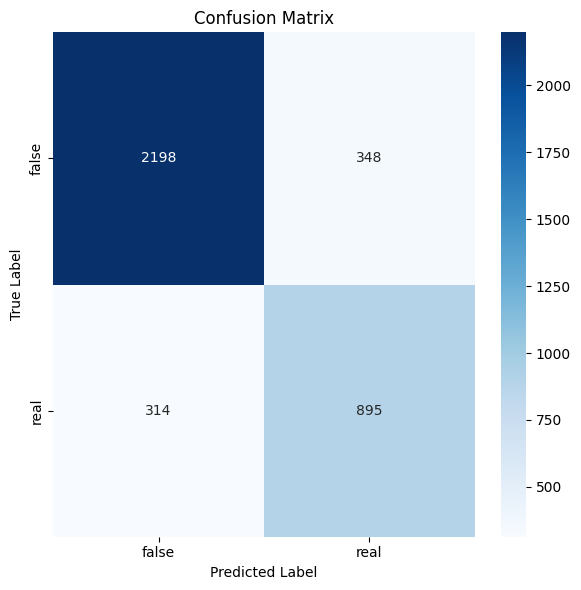

In [51]:
plot_confusion_matrix(ytest,svm_predictions,classes=['false','real'])

### Pipeline 2

In [55]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))

In [56]:
# Downsample labels
majority_class = datatrain[datatrain['label'] == 'fake']
minority_class = datatrain[datatrain['label'] == 'real']

# Undersample the majority class without replacement
majority_class_undersampled = majority_class.sample(len(minority_class), random_state=42)
# Concatenate the minority class with the downsampled majority class
datatrain_balanced = pd.concat([majority_class_undersampled, minority_class], axis=0)
# Shuffle the dataset to mix up the class order
datatrain_balanced = datatrain_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [57]:
# Fit and transform the 'tweetText' in datatrain_balanced to get ngrams
datatrain_balanced_ngrams = vectorizer.fit_transform(datatrain_balanced['tweetText'])
# Transform the 'tweetText' column of datatest using the same vectorizer
datatest_ngrams = vectorizer.transform(datatest['tweetText'])

In [58]:
# Calculate tweet length and frequency for the balanced training set
length_train_balanced = datatrain_balanced['tweet_length'].values.reshape(-1, 1)
frequency_train_balanced = datatrain_balanced['frequency'].values.reshape(-1, 1)
sentiment_train_balanced = datatrain_balanced['sentiment_score'].values.reshape(-1,1)

# Calculate tweet length and frequency for the test set
length_test = datatest['tweet_length'].values.reshape(-1, 1)
frequency_test = datatest['frequency'].values.reshape(-1, 1)
sentiment_test = datatrain['sentiment_score'].values.reshape(-1,1)

#Features & labels
xtrain = hstack([datatrain_balanced_ngrams, length_train_balanced, frequency_train_balanced])
xtest = hstack([datatest_ngrams, length_test, frequency_test])# Combine features for the test set
ytrain = datatrain_balanced['label'].values
ytest = datatest['label'].values


In [59]:
logreg = LogisticRegression(max_iter=10000, C=10)
logreg.fit(xtrain, ytrain)
log_pred = logreg.predict(xtest)
evaluate(ytest, log_pred)

Precision: 0.6872990353697749
Accuacy: 0.8021304926764314
Recall: 0.707196029776675
F1 Score: 0.6971055849979617
True Negatives (TN): 2157
False Positives (FP): 389
False Negatives (FN): 354
True Positives (TP): 855


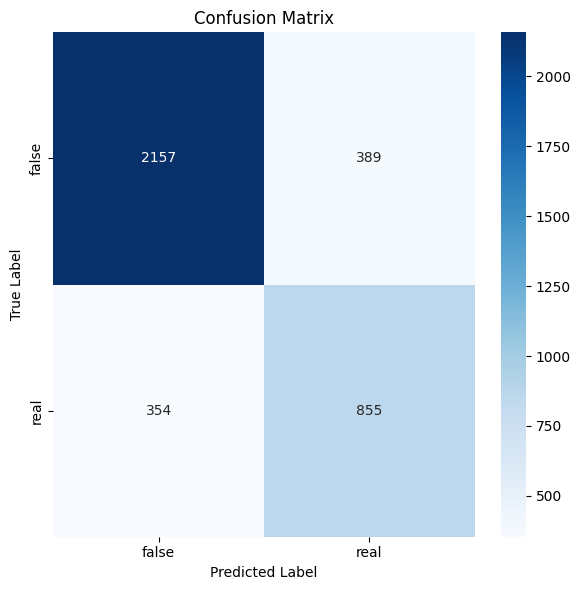

In [60]:
plot_confusion_matrix(ytest,log_pred,classes=['false','real'])